EXPLORATORY DATA ANALYSIS - PatrolIQ

✓ Libraries imported successfully!

LOADING DATA

✓ Dataset loaded successfully!
  File: C:\project\PatrolIQ  project\data_preprocessing\processed_crime_data.csv
  Records: 495,730
  Columns: 21
  Memory Usage: 217.58 MB

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495730 entries, 0 to 495729
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Id                    495730 non-null  int64         
 1   Case_Number           495730 non-null  object        
 2   Date                  495730 non-null  datetime64[ns]
 3   Primary_Type          495730 non-null  object        
 4   Description           495730 non-null  object        
 5   Location_Description  495730 non-null  object        
 6   Arrest                495730 non-null  bool          
 7   Domestic              495730 non-null  bool          
 8   District          

,Id,Case_Number,Date,Primary_Type,Description,Location_Description,Arrest,Domestic,District,Ward,...,Latitude,Longitude,Hour,Day_Of_Week,Month,Year,Day,Is_Weekend,Season,Crime_Severity_Score
0,14065329,JJ534188,2025-12-24,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,12,1.0,...,41.899780,-87.677161,0,Wednesday,12,2025,24,0,Winter,4.0
1,14064869,JJ533630,2025-12-24,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2,4.0,...,41.816104,-87.612839,0,Wednesday,12,2025,24,0,Winter,5.0
2,14067344,JJ536277,2025-12-24,THEFT,OVER $500,RESIDENCE,False,False,5,9.0,...,41.719258,-87.631028,0,Wednesday,12,2025,24,0,Winter,4.0
3,14064936,JJ533661,2025-12-24,ASSAULT,SIMPLE,RESIDENCE,False,True,5,10.0,...,41.655277,-87.597293,0,Wednesday,12,2025,24,0,Winter,7.0
4,14064927,JJ533771,2025-12-24,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,False,False,4,8.0,...,41.742151,-87.585767,0,Wednesday,12,2025,24,0,Winter,3.0



DATA QUALITY CHECK

⚠️  WARNING: Missing columns: ['Day_of_Week']
The analysis will skip visualizations that require these columns.

Missing Values:
✓ No missing values!

BASIC STATISTICS

📈 Overview:
  Total Crimes: 495,730
  Crime Types: 31
  Districts: 23
  Date Range: 2023-12-17 to 2025-12-24
  Time Span: 738 days

📊 Key Metrics:
  Arrest Rate: 14.78%
  Domestic Crime Rate: 18.79%
  Average Severity Score: 4.93/10

CRIME TYPE ANALYSIS

🔝 Top 15 Crime Types:
   1. THEFT                         : 116,115 (23.42%)
   2. BATTERY                       :  89,309 (18.02%)
   3. CRIMINAL DAMAGE               :  55,236 (11.14%)
   4. ASSAULT                       :  45,375 ( 9.15%)
   5. MOTOR VEHICLE THEFT           :  39,449 ( 7.96%)
   6. OTHER OFFENSE                 :  33,858 ( 6.83%)
   7. DECEPTIVE PRACTICE            :  28,240 ( 5.70%)
   8. BURGLARY                      :  18,157 ( 3.66%)
   9. ROBBERY                       :  15,262 ( 3.08%)
  10. NARCOTICS                     : 

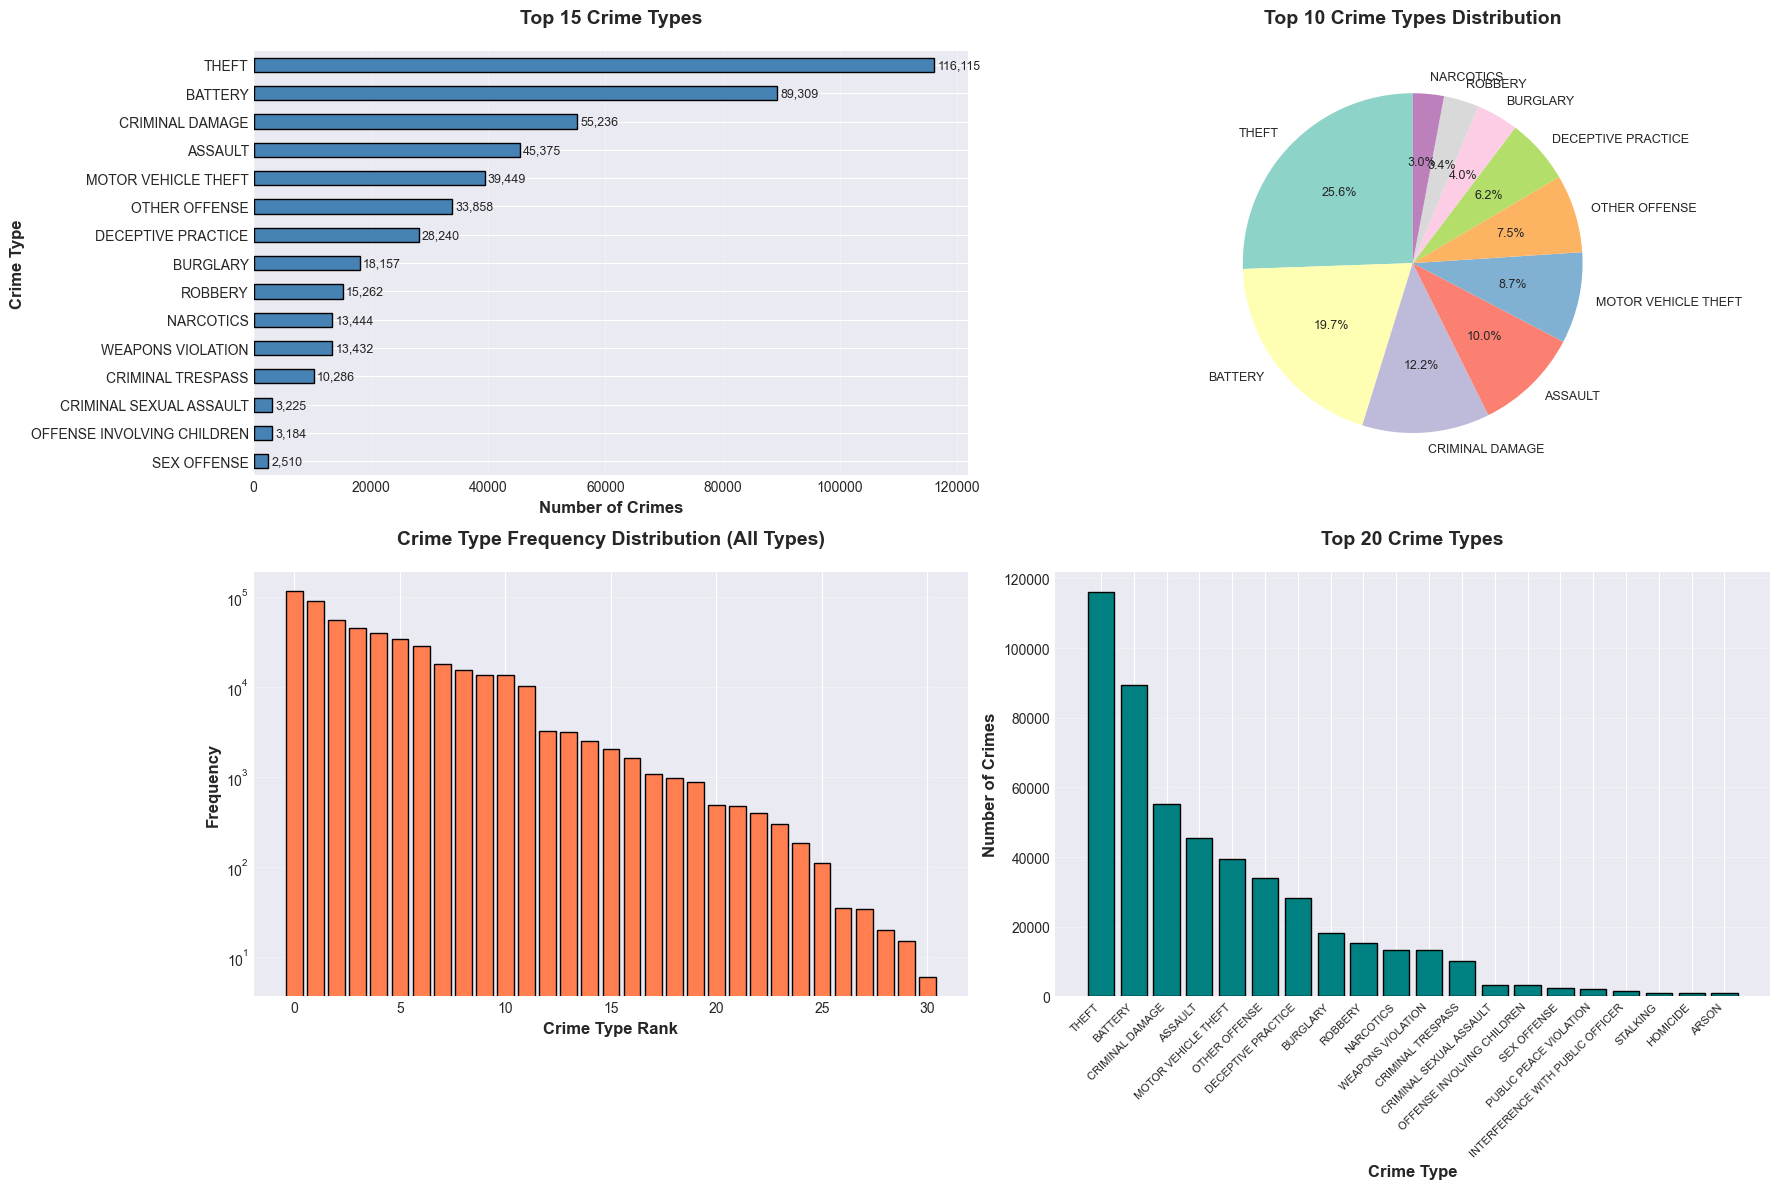


✓ Crime type analysis visualization saved!

TEMPORAL ANALYSIS
⚠️  Warning: Missing temporal columns: ['Day_of_Week']
Some temporal visualizations will be skipped.


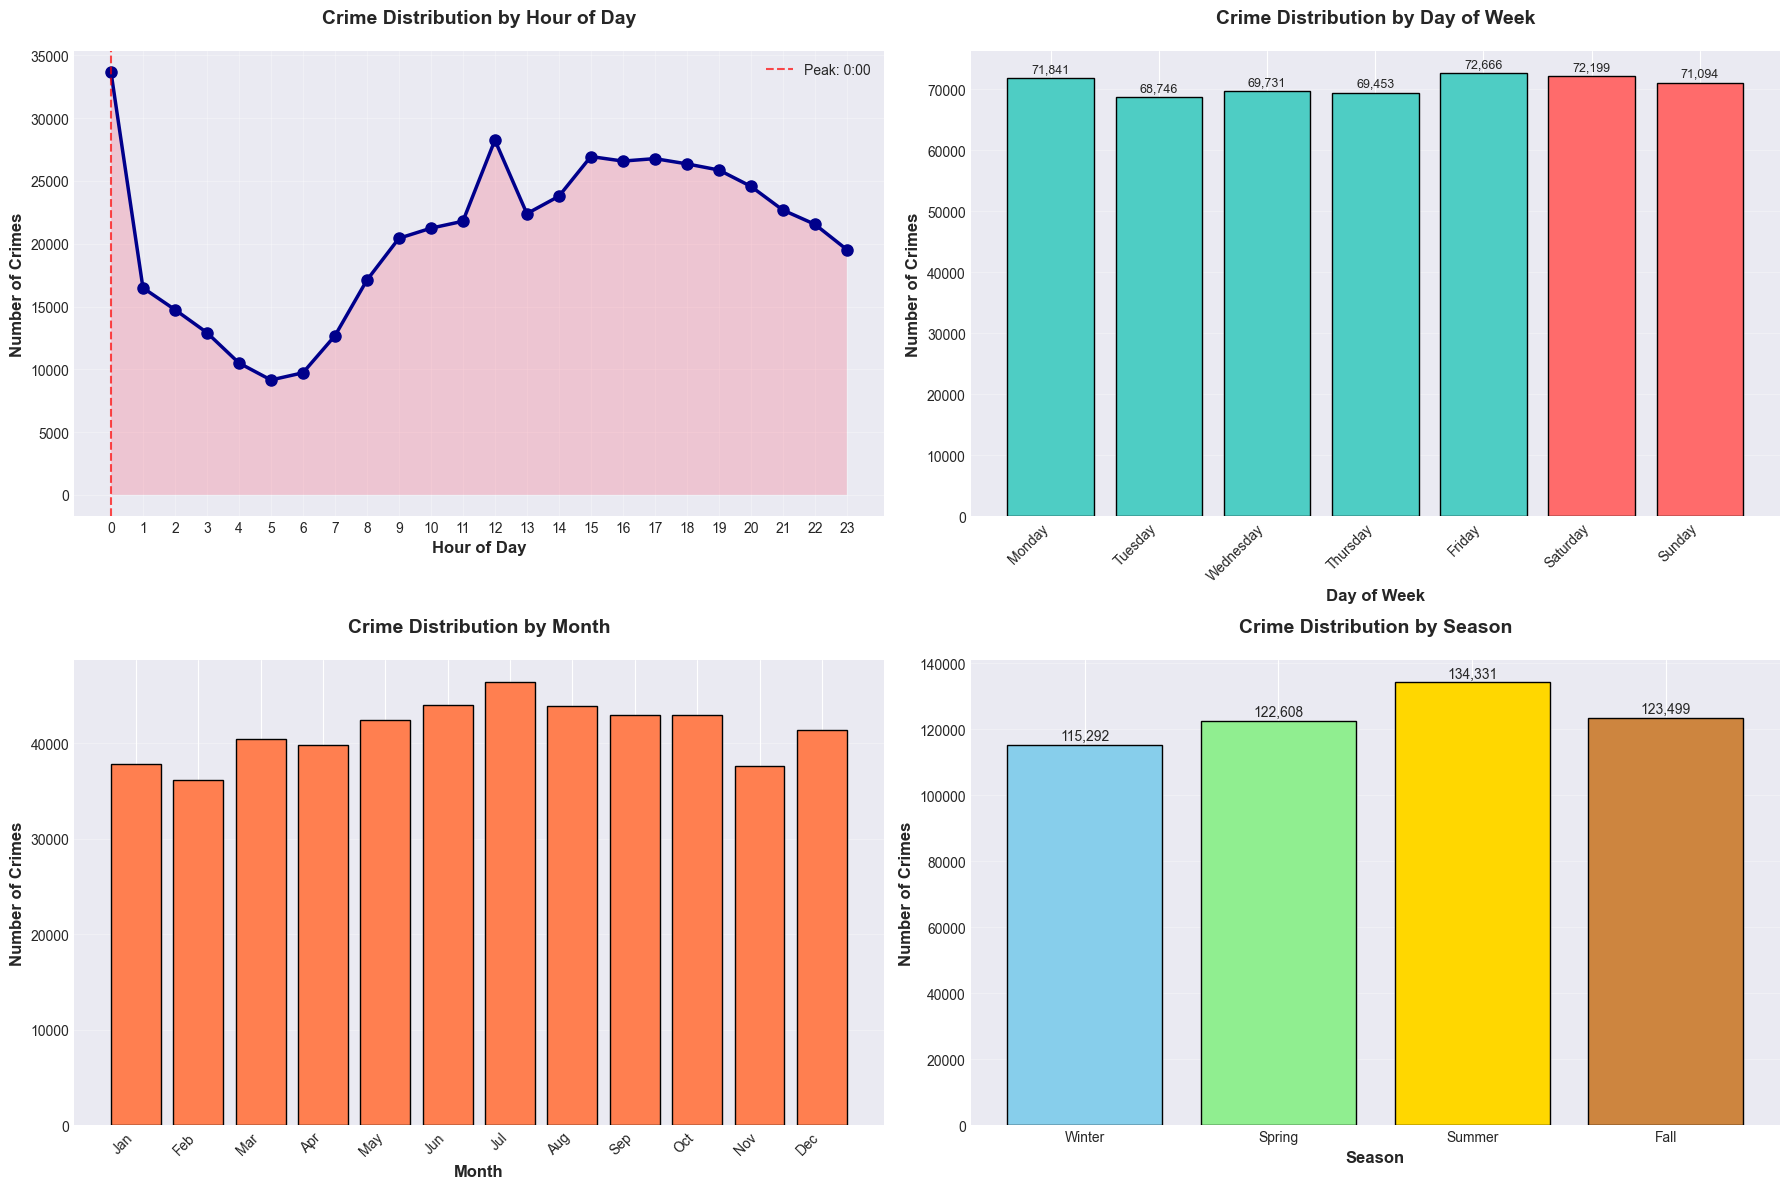


⏰ Temporal Insights:
  Peak Crime Hour: 0:00 (33,682 crimes)
  Lowest Crime Hour: 5:00 (9,148 crimes)

GEOGRAPHIC ANALYSIS


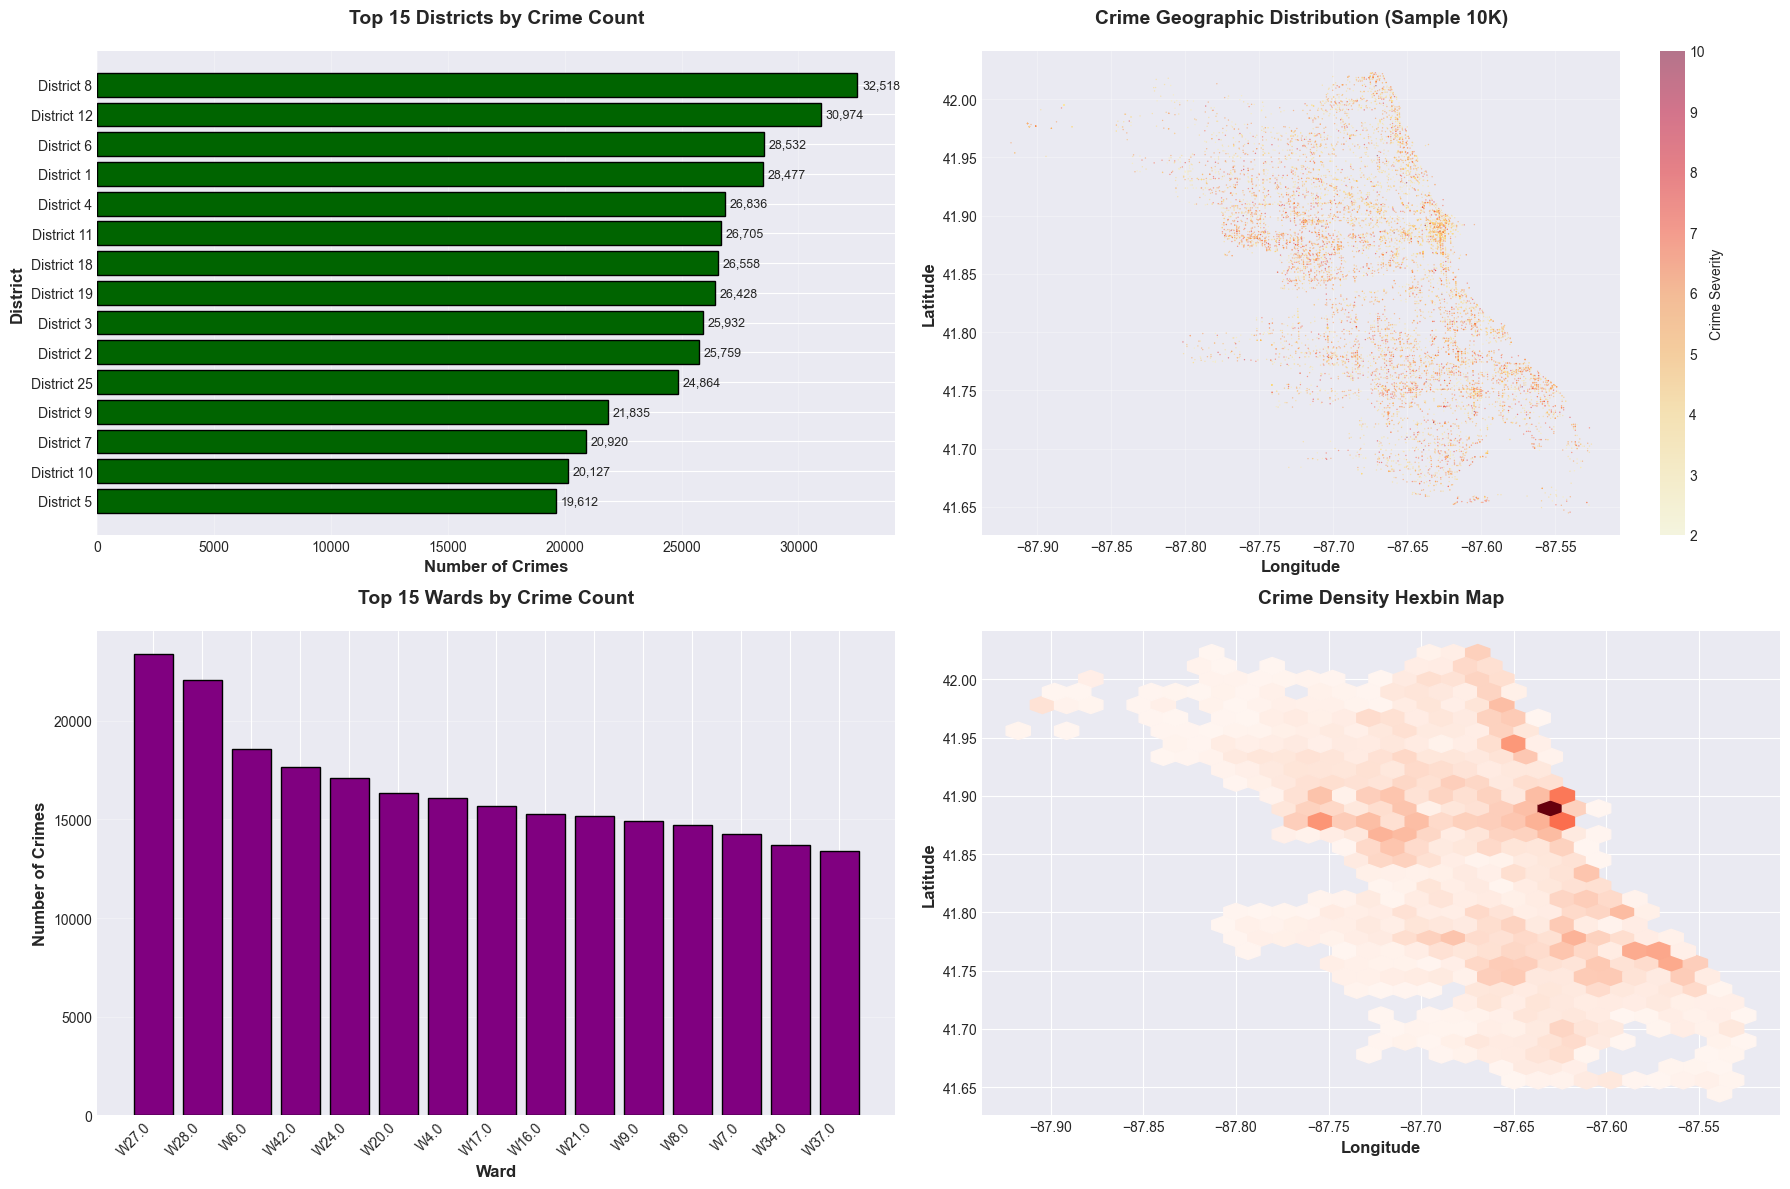

✓ Geographic analysis completed!

EDA ANALYSIS COMPLETED!

✅ Generated Visualizations:
  1. crime_type_analysis.png
  2. temporal_analysis.png
  3. geographic_analysis.png

📁 All files saved in: outputs/figures/eda/

✓ Analysis complete! Review the visualizations for insights.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directories
os.makedirs('outputs/figures/eda', exist_ok=True)

print("="*70)
print("EXPLORATORY DATA ANALYSIS - PatrolIQ")
print("="*70)
print("\n✓ Libraries imported successfully!")

# CELL 2: LOAD DATA

print("\n" + "="*70)
print("LOADING DATA")
print("="*70)

# UPDATED PATH - Use your actual file location
data_path = r'C:\project\PatrolIQ  project\data_preprocessing\processed_crime_data.csv'

try:
    # Load processed data
    df = pd.read_csv(data_path, parse_dates=['Date'])
    
    print(f"\n✓ Dataset loaded successfully!")
    print(f"  File: {data_path}")
    print(f"  Records: {len(df):,}")
    print(f"  Columns: {len(df.columns)}")
    print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except FileNotFoundError:
    print(f"\n✗ ERROR: File not found at {data_path}")
    print("\nPlease update the 'data_path' variable with the correct location of your processed_crime_data.csv file")
    raise
except Exception as e:
    print(f"\n✗ ERROR loading data: {e}")
    raise

print("\n📊 Dataset Info:")
print(df.info())

# Display first few rows
print("\n📋 First 5 rows:")
display(df.head())

# CELL 3: DATA QUALITY CHECK

print("\n" + "="*70)
print("DATA QUALITY CHECK")
print("="*70)

# Check for required columns
required_columns = ['Date', 'Primary_Type', 'Latitude', 'Longitude', 'Hour', 
                   'Day_of_Week', 'Month', 'Crime_Severity_Score', 'Arrest', 'District']

missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"\n⚠️  WARNING: Missing columns: {missing_columns}")
    print("The analysis will skip visualizations that require these columns.")
else:
    print("\n✓ All required columns present!")

# Check for missing values
print("\nMissing Values:")
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("✓ No missing values!")

# CELL 4: BASIC STATISTICS

print("\n" + "="*70)
print("BASIC STATISTICS")
print("="*70)

print(f"\n📈 Overview:")
print(f"  Total Crimes: {len(df):,}")
if 'Primary_Type' in df.columns:
    print(f"  Crime Types: {df['Primary_Type'].nunique()}")
if 'District' in df.columns:
    print(f"  Districts: {df['District'].nunique()}")
if 'Date' in df.columns:
    print(f"  Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"  Time Span: {(df['Date'].max() - df['Date'].min()).days} days")

# Arrest and domestic rates
if 'Arrest' in df.columns:
    arrest_rate = (df['Arrest'].sum() / len(df)) * 100
    print(f"\n📊 Key Metrics:")
    print(f"  Arrest Rate: {arrest_rate:.2f}%")
    
if 'Domestic' in df.columns:
    domestic_rate = (df['Domestic'].sum() / len(df)) * 100
    print(f"  Domestic Crime Rate: {domestic_rate:.2f}%")
    
if 'Crime_Severity_Score' in df.columns:
    print(f"  Average Severity Score: {df['Crime_Severity_Score'].mean():.2f}/10")


# CELL 5: CRIME TYPE ANALYSIS

print("\n" + "="*70)
print("CRIME TYPE ANALYSIS")
print("="*70)

if 'Primary_Type' not in df.columns:
    print("⚠️  Skipping crime type analysis - Primary_Type column not found")
else:
    # Top 15 crime types
    crime_counts = df['Primary_Type'].value_counts().head(15)
    
    print("\n🔝 Top 15 Crime Types:")
    for idx, (crime, count) in enumerate(crime_counts.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"  {idx:2d}. {crime:30s}: {count:7,} ({percentage:5.2f}%)")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Horizontal bar chart - Top 15
    crime_counts.plot(kind='barh', ax=axes[0, 0], color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Crime Type', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Top 15 Crime Types', fontsize=14, fontweight='bold', pad=20)
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(crime_counts.values):
        axes[0, 0].text(v + 500, i, f'{v:,}', va='center', fontsize=9)
    
    # 2. Pie chart - Top 10
    top_10 = df['Primary_Type'].value_counts().head(10)
    colors = plt.cm.Set3(range(len(top_10)))
    axes[0, 1].pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', 
                   startangle=90, colors=colors, textprops={'fontsize': 9})
    axes[0, 1].set_title('Top 10 Crime Types Distribution', fontsize=14, fontweight='bold', pad=20)
    
    # 3. Crime type frequency distribution
    all_crimes = df['Primary_Type'].value_counts()
    axes[1, 0].bar(range(len(all_crimes)), all_crimes.values, color='coral', edgecolor='black')
    axes[1, 0].set_xlabel('Crime Type Rank', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Crime Type Frequency Distribution (All Types)', fontsize=14, fontweight='bold', pad=20)
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # 4. Top 20 as vertical bars
    top_20 = df['Primary_Type'].value_counts().head(20)
    axes[1, 1].bar(range(len(top_20)), top_20.values, color='teal', edgecolor='black')
    axes[1, 1].set_xlabel('Crime Type', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Top 20 Crime Types', fontsize=14, fontweight='bold', pad=20)
    axes[1, 1].set_xticks(range(len(top_20)))
    axes[1, 1].set_xticklabels(top_20.index, rotation=45, ha='right', fontsize=8)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/figures/eda/crime_type_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Crime type analysis visualization saved!")

# CELL 6: TEMPORAL ANALYSIS - HOURLY AND DAILY

print("\n" + "="*70)
print("TEMPORAL ANALYSIS")
print("="*70)

# Check for required temporal columns
temporal_cols = ['Hour', 'Day_of_Week', 'Month', 'Season']
missing_temporal = [col for col in temporal_cols if col not in df.columns]

if missing_temporal:
    print(f"⚠️  Warning: Missing temporal columns: {missing_temporal}")
    print("Some temporal visualizations will be skipped.")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Hourly distribution
if 'Hour' in df.columns:
    hourly_crimes = df['Hour'].value_counts().sort_index()
    peak_hour = hourly_crimes.idxmax()
    min_hour = hourly_crimes.idxmin()
    
    axes[0, 0].plot(hourly_crimes.index, hourly_crimes.values, 
                    marker='o', linewidth=2.5, markersize=8, color='darkblue')
    axes[0, 0].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.7, label=f'Peak: {peak_hour}:00')
    axes[0, 0].fill_between(hourly_crimes.index, hourly_crimes.values, alpha=0.3)
    axes[0, 0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Crime Distribution by Hour of Day', fontsize=14, fontweight='bold', pad=20)
    axes[0, 0].set_xticks(range(0, 24))
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
else:
    axes[0, 0].text(0.5, 0.5, 'Hour column not available', ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Day of week distribution
if 'Day_of_Week' in df.columns or 'Day_Of_Week' in df.columns:
    day_col = 'Day_of_Week' if 'Day_of_Week' in df.columns else 'Day_Of_Week'
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_crimes = df[day_col].value_counts().reindex(day_order)
    colors_days = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
    
    axes[0, 1].bar(range(len(day_crimes)), day_crimes.values, color=colors_days, edgecolor='black')
    axes[0, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Crime Distribution by Day of Week', fontsize=14, fontweight='bold', pad=20)
    axes[0, 1].set_xticks(range(len(day_order)))
    axes[0, 1].set_xticklabels(day_order, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(day_crimes.values):
        axes[0, 1].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=9)
else:
    axes[0, 1].text(0.5, 0.5, 'Day_of_Week column not available', ha='center', va='center', transform=axes[0, 1].transAxes)

# 3. Monthly distribution
if 'Month' in df.columns:
    monthly_crimes = df['Month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    axes[1, 0].bar(monthly_crimes.index, monthly_crimes.values, color='coral', edgecolor='black')
    axes[1, 0].set_xlabel('Month', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Crime Distribution by Month', fontsize=14, fontweight='bold', pad=20)
    axes[1, 0].set_xticks(range(1, 13))
    axes[1, 0].set_xticklabels(month_names, rotation=45, ha='right')
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Month column not available', ha='center', va='center', transform=axes[1, 0].transAxes)

# 4. Seasonal distribution
if 'Season' in df.columns:
    season_crimes = df['Season'].value_counts()
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_crimes = season_crimes.reindex(season_order)
    season_colors = ['#87CEEB', '#90EE90', '#FFD700', '#CD853F']
    
    axes[1, 1].bar(season_crimes.index, season_crimes.values, color=season_colors, edgecolor='black')
    axes[1, 1].set_xlabel('Season', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Crime Distribution by Season', fontsize=14, fontweight='bold', pad=20)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(season_crimes.values):
        axes[1, 1].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=10)
else:
    axes[1, 1].text(0.5, 0.5, 'Season column not available', ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.savefig('outputs/figures/eda/temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print temporal insights
if 'Hour' in df.columns:
    print("\n⏰ Temporal Insights:")
    print(f"  Peak Crime Hour: {peak_hour}:00 ({hourly_crimes[peak_hour]:,} crimes)")
    print(f"  Lowest Crime Hour: {min_hour}:00 ({hourly_crimes[min_hour]:,} crimes)")

# CELL 7: GEOGRAPHIC ANALYSIS

print("\n" + "="*70)
print("GEOGRAPHIC ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. District analysis
if 'District' in df.columns:
    district_crimes = df['District'].value_counts().head(15)
    
    axes[0, 0].barh(range(len(district_crimes)), district_crimes.values, color='darkgreen', edgecolor='black')
    axes[0, 0].set_yticks(range(len(district_crimes)))
    axes[0, 0].set_yticklabels([f'District {d}' for d in district_crimes.index])
    axes[0, 0].set_xlabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('District', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Top 15 Districts by Crime Count', fontsize=14, fontweight='bold', pad=20)
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(district_crimes.values):
        axes[0, 0].text(v + 200, i, f'{v:,}', va='center', fontsize=9)
else:
    axes[0, 0].text(0.5, 0.5, 'District column not available', ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Geographic scatter
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    sample_df = df.sample(min(10000, len(df)))
    
    if 'Crime_Severity_Score' in df.columns:
        scatter = axes[0, 1].scatter(sample_df['Longitude'], sample_df['Latitude'],
                                    c=sample_df['Crime_Severity_Score'],
                                    cmap='YlOrRd', alpha=0.5, s=1, edgecolors='none')
        plt.colorbar(scatter, ax=axes[0, 1], label='Crime Severity')
    else:
        axes[0, 1].scatter(sample_df['Longitude'], sample_df['Latitude'],
                          alpha=0.5, s=1, color='red', edgecolors='none')
    
    axes[0, 1].set_xlabel('Longitude', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Latitude', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Crime Geographic Distribution (Sample 10K)', fontsize=14, fontweight='bold', pad=20)
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Latitude/Longitude columns not available', ha='center', va='center', transform=axes[0, 1].transAxes)

# 3. Ward distribution
if 'Ward' in df.columns:
    ward_crimes = df['Ward'].value_counts().head(15)
    axes[1, 0].bar(range(len(ward_crimes)), ward_crimes.values, color='purple', edgecolor='black')
    axes[1, 0].set_xlabel('Ward', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Top 15 Wards by Crime Count', fontsize=14, fontweight='bold', pad=20)
    axes[1, 0].set_xticks(range(len(ward_crimes)))
    axes[1, 0].set_xticklabels([f'W{w}' for w in ward_crimes.index], rotation=45, ha='right')
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Ward column not available', ha='center', va='center', transform=axes[1, 0].transAxes)

# 4. Hexbin density
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    axes[1, 1].hexbin(sample_df['Longitude'], sample_df['Latitude'], 
                      gridsize=30, cmap='Reds', mincnt=1)
    axes[1, 1].set_xlabel('Longitude', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Latitude', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Crime Density Hexbin Map', fontsize=14, fontweight='bold', pad=20)
else:
    axes[1, 1].text(0.5, 0.5, 'Latitude/Longitude columns not available', ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.savefig('outputs/figures/eda/geographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Geographic analysis completed!")

# CELL 8: FINAL SUMMARY

print("\n" + "="*70)
print("EDA ANALYSIS COMPLETED!")
print("="*70)

print("\n✅ Generated Visualizations:")
print("  1. crime_type_analysis.png")
print("  2. temporal_analysis.png")
print("  3. geographic_analysis.png")

print("\n📁 All files saved in: outputs/figures/eda/")
print("\n✓ Analysis complete! Review the visualizations for insights.")